In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


#opening the DF
df=pd.read_csv('bank.csv', encoding="utf-8", sep=";")

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [68]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [69]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [70]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [72]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [73]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [74]:
#detailed segmentation analysis based on demographic factors, customer behavior, and financial history.

#demographic factor

df['age'].value_counts()

age
34    231
32    224
31    199
36    188
33    186
     ... 
76      2
81      1
86      1
87      1
84      1
Name: count, Length: 67, dtype: int64

In [75]:
df['job'].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

In [76]:
df['education'].value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

In [77]:
df['marital'].value_counts()

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

In [78]:
#customer behaviour
df['y'].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

In [79]:
#financial history
df[['loan', 'housing', 'default']]

,loan,housing,default
0,no,no,no
1,yes,yes,no
2,no,yes,no
3,yes,yes,no
4,no,yes,no
...,...,...,...
4516,no,yes,no
4517,yes,yes,yes
4518,no,no,no
4519,no,no,no


In [80]:
df['balance'].value_counts()

balance
0       357
2        24
1        15
4        13
23       11
       ... 
5304      1
6969      1
572       1
164       1
4554      1
Name: count, Length: 2353, dtype: int64

[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 86, 87]


Text(0.5, 1.0, 'Number of people reached based on age')

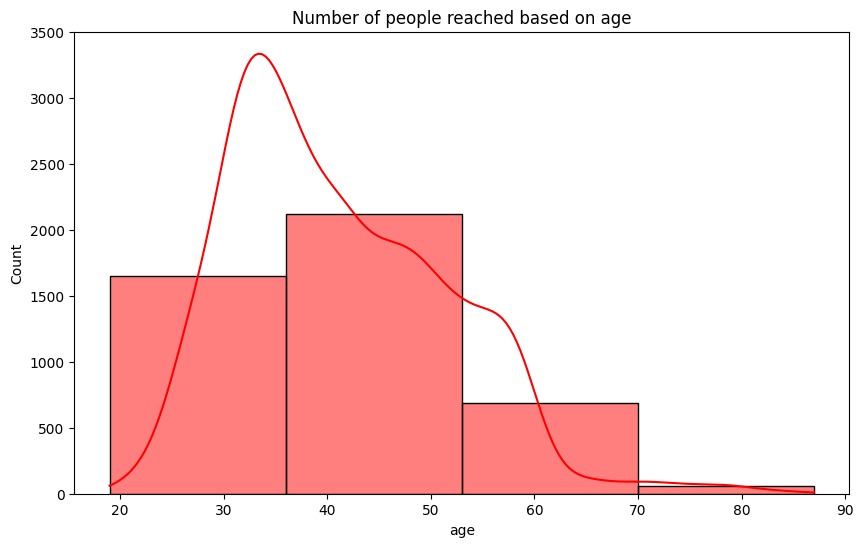

In [81]:
#demographic factors
test=df['age'].unique().tolist()
test.sort()
print(test)

#age bin
bins = [0, 30, 50, 70, 90]
labels = ['0-30', '31-50', '51-70', '71-90']

df['age_bin']=pd.cut(df['age'], bins=bins, labels=labels)

df.head()

#check number of person in age bins
binned=df['age_bin'].value_counts()
binned

#order bins
binned = binned.reindex(labels, fill_value=0)
binned

#campagne based on age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=4, kde=True, color='red')

plt.title('Number of people reached based on age')



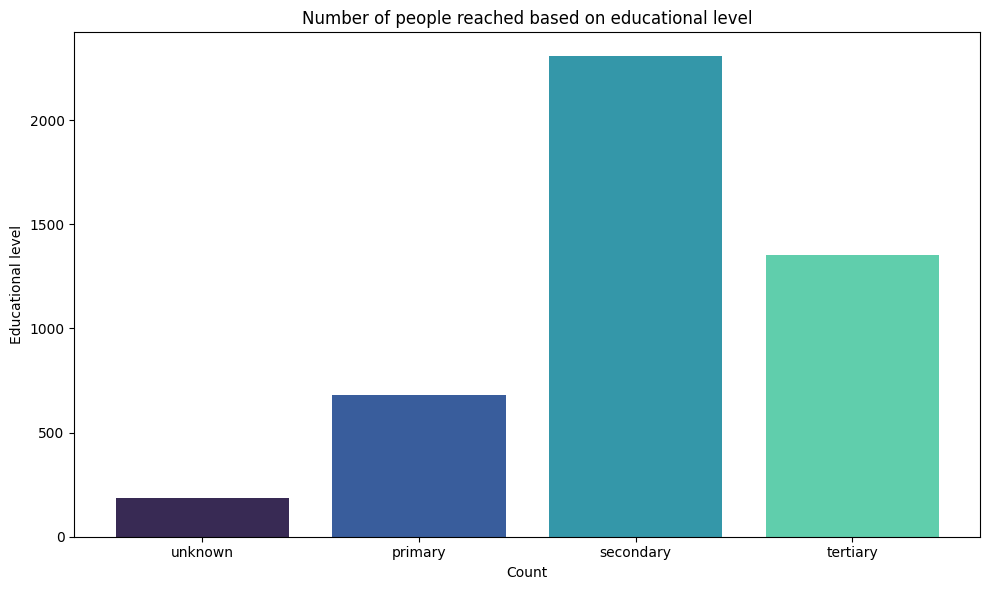

In [82]:
#campaign based on education

edu_order = [
    'unknown', 'primary', 'secondary', 'tertiary'
]

df['education'] = pd.Categorical(df['education'], categories=edu_order, ordered=True)

edu = df['education'].value_counts().sort_index()

colors = sns.color_palette("mako", len(edu))

plt.figure(figsize=(10, 6))
plt.bar(edu.index, edu.values, color=colors)
plt.title('Number of people reached based on educational level')
plt.xlabel('Count')
plt.ylabel('Educational level')
plt.tight_layout()
plt.show()

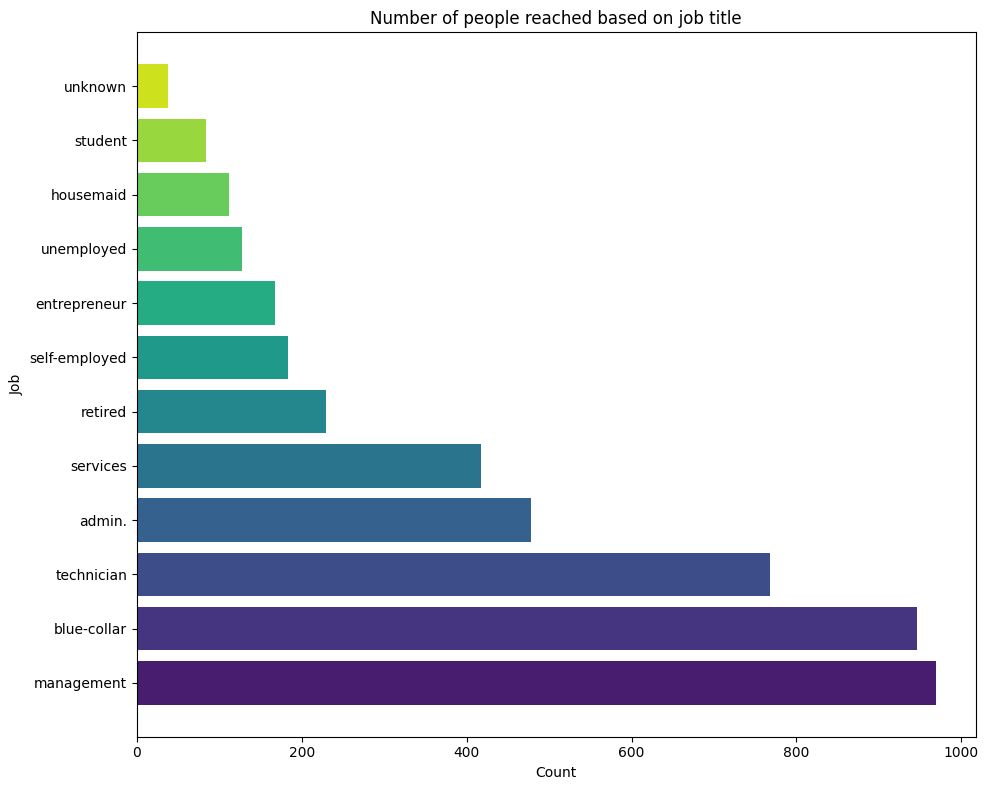

In [83]:
#campaign based on jobs
jobs = df['job'].value_counts()

colors = sns.color_palette("viridis", len(jobs))

plt.figure(figsize=(10, 8))
plt.barh(jobs.index, jobs.values, color=colors)
plt.title('Number of people reached based on job title')
plt.xlabel('Count')
plt.ylabel('Job')
plt.tight_layout()
plt.show()

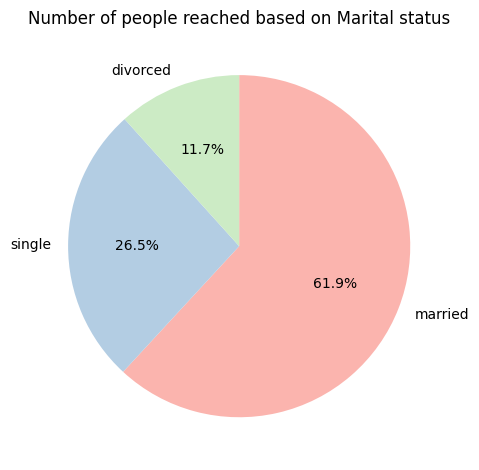

In [84]:
#campaign based on marital status
marital = df['marital'].value_counts()

plt.Figure(figsize=(8,8))
marital.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    colors=plt.cm.Pastel1.colors
)

plt.title('Number of people reached based on Marital status')
plt.ylabel("")
plt.tight_layout()
plt.show()

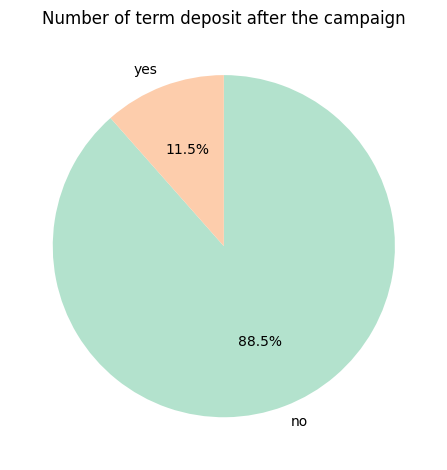

In [85]:
#customer behaviour
#how many customers has subscribed to a term deposit after the campaign

cust_behaviour = df['y'].value_counts()

plt.Figure(figsize=(8,8))
cust_behaviour.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    colors=plt.cm.Pastel2.colors
)

plt.title('Number of term deposit after the campaign')
plt.ylabel("")
plt.tight_layout()
plt.show()


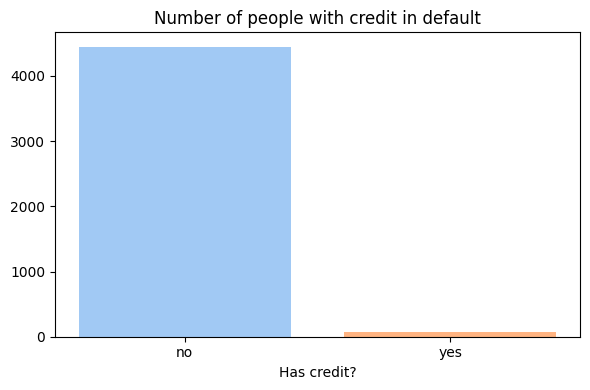

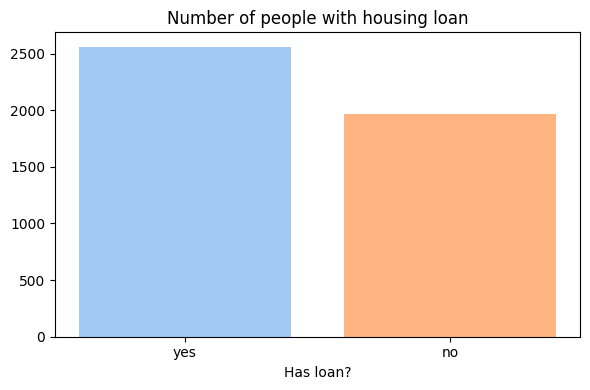

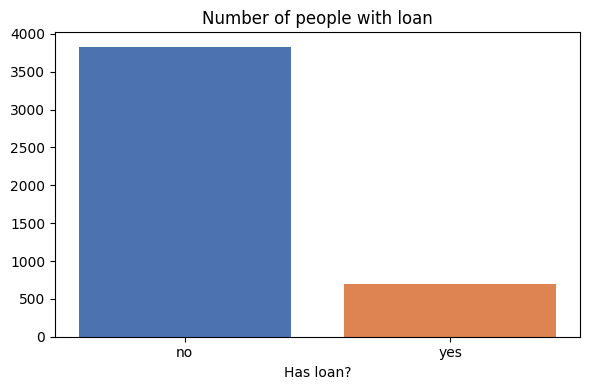

In [86]:
#financial history

#default credit

default = df['default'].value_counts()

colors = sns.color_palette("pastel", len(default))

plt.figure(figsize=(6, 4))
plt.bar(default.index, default.values, color=colors)
plt.title('Number of people with credit in default')
plt.xlabel('Has credit?')
plt.ylabel('')
plt.tight_layout()
plt.show()

#housing loan

hloan = df['housing'].value_counts()

colors = sns.color_palette("pastel", len(hloan))

plt.figure(figsize=(6, 4))
plt.bar(hloan.index, hloan.values, color=colors)
plt.title('Number of people with housing loan')
plt.xlabel('Has loan?')
plt.ylabel('')
plt.tight_layout()
plt.show()

#loan
loan = df['loan'].value_counts()

colors = sns.color_palette("deep", len(loan))

plt.figure(figsize=(6, 4))
plt.bar(loan.index, loan.values, color=colors)
plt.title('Number of people with loan')
plt.xlabel('Has loan?')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [87]:
#Identify distinct customer segments and understand their response patterns to past marketing campaigns.

df[['age', 'job', 'marital', 'balance', 'default', 'housing', 'loan', 'poutcome', 'y']].head()

#replace string with numerical figure

df_encoded = pd.get_dummies(df[['age', 'job', 'marital', 'balance', 'default', 'housing', 'loan', 'poutcome', 'y']], drop_first=True)

In [88]:
# Use KMeans to identify customer segments
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['segment'] = kmeans.fit_predict(df_encoded)

In [89]:
# Analyze response pattern by segment

segment_mapping = {
    0: 'No-response',
    1: 'Positive response',
    2: 'Negative response'
}

df['seg_label'] = df['segment'].map(segment_mapping)

response_by_segment = df.groupby('seg_label')['y'].value_counts(normalize=True).unstack()

response_by_segment

y,no,yes
seg_label,,
Negative response,0.942857,0.057143
No-response,0.842735,0.157265
Positive response,0.890067,0.109933


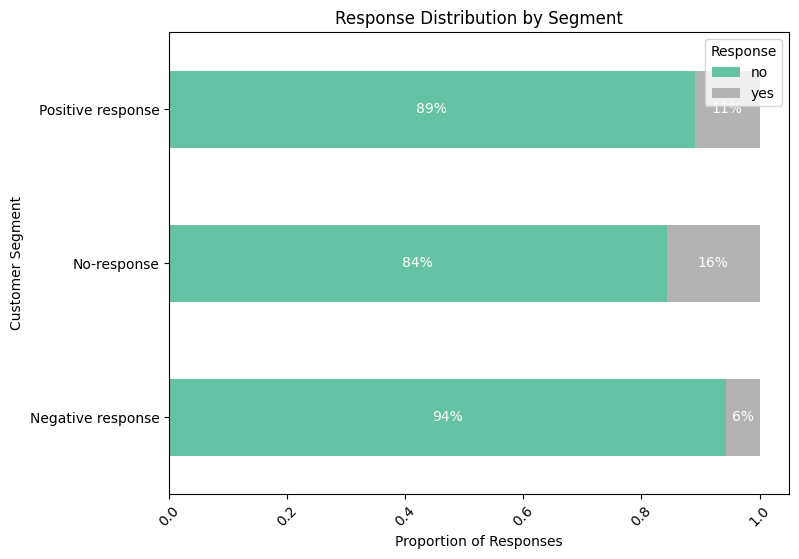

In [90]:
#ploting response pattern by segment

ax = response_by_segment.plot(kind='barh', stacked=True, figsize=(8, 6), colormap='Set2')

plt.title('Response Distribution by Segment')
plt.xlabel('Proportion of Responses')
plt.ylabel('Customer Segment')

plt.xticks(rotation=45)
plt.legend(title='Response', loc='upper right')

# Add % labels inside the bars for a better visualization
for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        if width > 0.03:  # only label if large enough
            ax.text(
                bar.get_x() + width / 2,
                bar.get_y() + bar.get_height() / 2,
                f"{int(round(width * 100))}%",
                ha='center', va='center', color='white', fontsize=10
            )

plt.show()


